## Data Science from Scratch

#### Meeting: Jun 27, 2019 @ Cinco Ranch Library, Classroom on 2nd Floor

Reading through and working exercises from the Second Edition of Joel Grus' classic book, Data Science from Scratch: First Priciples from Python

### Chapter 8 - Gradient Descent

In [2]:
from scratch.linear_algebra import Vector, dot

In [3]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [6]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [7]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

In [12]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.1) for x in xs]

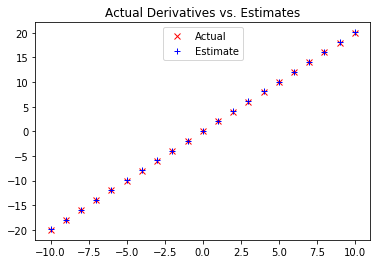

In [13]:
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()


In [15]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]    
    return (f(w) - f(v)) / h

In [18]:
def estimate_gradient(f: Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]


### Using the Gradient

In [43]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add (v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

print(-1, v)

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    #print(epoch, grad)
    v = gradient_step(v, grad, -0.01)
    if sum([abs(x) for x in v]) < 0.000001: print('Done')
    print(epoch, v)
    #print()
    
assert distance(v, [0, 0, 0]) < 0.001


-1 [7.961961854068953, 2.727156560788199, -5.720927777643807]
0 [7.802722616987574, 2.672613429572435, -5.6065092220909305]
1 [7.6466681646478225, 2.6191611609809864, -5.494379037649112]
2 [7.493734801354866, 2.566777937761367, -5.3844914568961295]
3 [7.343860105327769, 2.5154423790061395, -5.276801627758207]
4 [7.196982903221214, 2.4651335314260168, -5.171265595203043]
5 [7.05304324515679, 2.4158308607974965, -5.067840283298983]
6 [6.9119823802536535, 2.367514243581547, -4.966483477633004]
7 [6.77374273264858, 2.320163958709916, -4.867153808080343]
8 [6.638267877995609, 2.2737606795357177, -4.769810731918736]
9 [6.505502520435696, 2.2282854659450035, -4.674414517280361]
10 [6.375392470026982, 2.1837197566261035, -4.580926226934754]
11 [6.247884620626443, 2.1400453614935815, -4.48930770239606]
12 [6.122926928213914, 2.0972444542637096, -4.3995215483481385]
13 [6.000468389649636, 2.0552995651784354, -4.3115311173811754]
14 [5.880459021856643, 2.014193573874867, -4.225300495033552]
15 [5

### Using Gradient Descent to Fit Models

In [45]:
# y = ax + b, where a=20 (slope), b=5 (intercept)
inputs = [(x, 20 * x + 5) for x in range (-50, 50)]

In [49]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [51]:
from scratch.linear_algebra import vector_mean

theta = [random.uniform(-1,1), random.uniform(-1,1)]

print(theta)
print()

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1


[0.635584024162466, -0.5072825515178232]

0 [32.91055817333211, -0.5156324023906251]
1 [11.383142065985094, -0.4916905794125118]
2 [25.74195255140853, -0.48932405618770164]
3 [16.164628324154325, -0.4726034555239177]
4 [22.552720304333544, -0.46549362028871555]
5 [18.291870063389236, -0.45200991274380453]
6 [21.133870657806636, -0.44281402285492766]
7 [19.23826545722012, -0.4307945241514112]
8 [20.502646145510028, -0.4206946696458882]
9 [19.659314326275165, -0.4093506341610864]
10 [20.221827993740305, -0.39887261856648903]
11 [19.84664185555665, -0.3878530453356157]
12 [20.096902029298377, -0.3772306973893878]
13 [19.929989115760595, -0.3663793339653107]
14 [20.041330880453717, -0.35571658618161955]
15 [19.96707658615119, -0.34496382212880256]
16 [20.016614953215026, -0.3343068178983938]
17 [19.98358351938768, -0.32362158930938195]
18 [20.00562617097911, -0.31299076261137554]
19 [19.990934353194323, -0.30235915491517373]
20 [20.000744427264472, -0.2917635022521491]
21 [19.9942117035123

808 [19.99934346433246, 3.9068677192253563]
809 [19.999344777009476, 3.9090533272512378]
810 [19.99934608706193, 3.9112345653737446]
811 [19.999347394495068, 3.913411442330059]
812 [19.99934869931412, 3.915583966839894]
813 [19.999350001524324, 3.9177521476055284]
814 [19.999351301130883, 3.9199159933118417]
815 [19.999352598139012, 3.922075512626349]
816 [19.999353892553906, 3.9242307141992354]
817 [19.999355184380743, 3.9263816066633908]
818 [19.999356473624708, 3.928528198634445]
819 [19.999357760290955, 3.9306704987108008]
820 [19.999359044384644, 3.93280851547367]
821 [19.999360325910917, 3.9349422574871076]
822 [19.999361604874906, 3.937071733298044]
823 [19.999362881281737, 3.939196951436323]
824 [19.99936415513652, 3.941317920414732]
825 [19.999365426444356, 3.9434346487290393]
826 [19.999366695210345, 3.9455471448580255]
827 [19.999367961439557, 3.94765541726352]
828 [19.99936922513708, 3.9497594743904325]
829 [19.999370486307956, 3.951859324666789]
830 [19.99937174495726, 3.9

1398 [19.99979842721931, 4.664381199086494]
1399 [19.999798830243808, 4.66505223511554]
1400 [19.999799232462497, 4.665721929475552]
1401 [19.99979963387699, 4.666390284849063]
1402 [19.999800034488896, 4.667057303913242]
1403 [19.99980043429982, 4.667722989339905]
1404 [19.999800833311358, 4.668387343795525]
1405 [19.99980123152512, 4.669050369941245]
1406 [19.999801628942688, 4.669712070432888]
1407 [19.99980202556566, 4.670372447920965]
1408 [19.999802421395625, 4.6710315050506885]
1409 [19.99980281643417, 4.671689244461983]
1410 [19.99980321068287, 4.672345668789493]
1411 [19.999803604143317, 4.673000780662597]
1412 [19.99980399681707, 4.673654582705415]
1413 [19.99980438870572, 4.674307077536821]
1414 [19.999804779810823, 4.674958267770453]
1415 [19.99980517013395, 4.675608156014723]
1416 [19.99980555967667, 4.676256744872828]
1417 [19.999805948440535, 4.676904036942759]
1418 [19.999806336427106, 4.677550034817314]
1419 [19.99980672363794, 4.6781947410841065]
1420 [19.999807110074

2112 [19.999951713583382, 4.9196030873255125]
2113 [19.99995181012721, 4.919763832864445]
2114 [19.999951906478014, 4.919924257008843]
2115 [19.999952002636174, 4.920084360401303]
2116 [19.999952098602073, 4.920244143683136]
2117 [19.9999521943761, 4.920403607494372]
2118 [19.999952289958635, 4.920562752473759]
2119 [19.999952385350063, 4.92072157925877]
2120 [19.999952480550768, 4.920880088485602]
2121 [19.999952575561124, 4.921038280789182]
2122 [19.999952670381518, 4.921196156803165]
2123 [19.99995276501233, 4.92135371715994]
2124 [19.999952859453934, 4.921510962490633]
2125 [19.999952953706718, 4.921667893425106]
2126 [19.999953047771044, 4.9218245105919625]
2127 [19.999953141647307, 4.92198081461855]
2128 [19.999953235335866, 4.92213680613096]
2129 [19.99995332883711, 4.922292485754034]
2130 [19.999953422151403, 4.922447854111363]
2131 [19.999953515279124, 4.922602911825292]
2132 [19.99995360822065, 4.922757659516921]
2133 [19.99995370097634, 4.922912097806107]
2134 [19.9999537935

2756 [19.999986693559936, 4.977844769299539]
2757 [19.999986720164824, 4.9778890664545]
2758 [19.999986746716516, 4.977933275041756]
2759 [19.999986773215124, 4.977977395238389]
2760 [19.99998679966075, 4.978021427221127]
2761 [19.9999868260535, 4.978065371166346]
2762 [19.99998685239348, 4.978109227250067]
2763 [19.9999868786808, 4.97815299564796]
2764 [19.999986904915552, 4.978196676535345]
2765 [19.99998693109786, 4.9782402700871895]
2766 [19.999986957227815, 4.978283776478113]
2767 [19.999986983305526, 4.978327195882385]
2768 [19.999987009331097, 4.978370528473926]
2769 [19.99998703530463, 4.9784137744263095]
2770 [19.999987061226236, 4.978456933912762]
2771 [19.999987087096013, 4.978500007106162]
2772 [19.999987112914067, 4.978542994179046]
2773 [19.999987138680495, 4.978585895303602]
2774 [19.999987164395414, 4.978628710651675]
2775 [19.99998719005891, 4.978671440394767]
2776 [19.9999872156711, 4.978714084704037]
2777 [19.99998724123208, 4.9787566437503]
2778 [19.999987266741954,

3401 [19.999996340433952, 4.993906820331692]
3402 [19.999996347750887, 4.993919003031463]
3403 [19.999996355053188, 4.993931161373151]
3404 [19.999996362340898, 4.993943295405458]
3405 [19.999996369614028, 4.9939554051769885]
3406 [19.99999637687262, 4.993967490736249]
3407 [19.9999963841167, 4.993979552131648]
3408 [19.999996391346293, 4.993991589411502]
3409 [19.999996398561432, 4.9940036026240255]
3410 [19.99999640576215, 4.994015591817339]
3411 [19.999996412948462, 4.994027557039467]
3412 [19.999996420120414, 4.994039498338337]
3413 [19.99999642727802, 4.99405141576178]
3414 [19.999996434421323, 4.994063309357535]
3415 [19.999996441550334, 4.994075179173241]
3416 [19.9999964486651, 4.994087025256445]
3417 [19.999996455765633, 4.994098847654597]
3418 [19.99999646285198, 4.994110646415054]
3419 [19.999996469924145, 4.994122421585076]
3420 [19.99999647698218, 4.9941341732118305]
3421 [19.9999964840261, 4.994145901342389]
3422 [19.999996491055935, 4.99415760602373]
3423 [19.99999649807

4147 [19.99999917774151, 4.998630939125366]
4148 [19.999999179385537, 4.998633676424857]
4149 [19.999999181026272, 4.998636408251393]
4150 [19.99999918266373, 4.9986391346159165]
4151 [19.99999918429791, 4.998641855529348]
4152 [19.999999185928825, 4.998644571002587]
4153 [19.999999187556476, 4.998647281046511]
4154 [19.999999189180876, 4.998649985671974]
4155 [19.99999919080203, 4.9986526848898105]
4156 [19.999999192419935, 4.998655378710833]
4157 [19.999999194034615, 4.998658067145831]
4158 [19.99999919564606, 4.998660750205574]
4159 [19.999999197254283, 4.9986634279008095]
4160 [19.999999198859292, 4.9986661002422625]
4161 [19.999999200461094, 4.998668767240638]
4162 [19.99999920205969, 4.998671428906618]
4163 [19.999999203655094, 4.998674085250864]
4164 [19.999999205247303, 4.998676736284017]
4165 [19.999999206836332, 4.998679382016697]
4166 [19.99999920842218, 4.9986820224595]
4167 [19.999999210004866, 4.998684657623003]
4168 [19.999999211584377, 4.998687287517762]
4169 [19.999999

4836 [19.999999792923226, 4.999655217048304]
4837 [19.999999793337256, 4.999655906407131]
4838 [19.999999793750458, 4.9996565943876545]
4839 [19.999999794162832, 4.99965728099263]
4840 [19.999999794574382, 4.999657966224808]
4841 [19.99999979498511, 4.999658650086933]
4842 [19.999999795395016, 4.999659332581744]
4843 [19.999999795804104, 4.999660013711975]
4844 [19.999999796212375, 4.999660693480355]
4845 [19.999999796619825, 4.999661371889607]
4846 [19.999999797026465, 4.999662048942447]
4847 [19.99999979743229, 4.999662724641589]
4848 [19.999999797837305, 4.999663398989738]
4849 [19.999999798241507, 4.999664071989596]
4850 [19.999999798644904, 4.999664743643858]
4851 [19.999999799047494, 4.999665413955215]
4852 [19.999999799449277, 4.999666082926352]
4853 [19.999999799850258, 4.999666750559949]
4854 [19.99999980025044, 4.999667416858679]
4855 [19.999999800649814, 4.999668081825212]
4856 [19.9999998010484, 4.999668745462212]
4857 [19.99999980144618, 4.999669407772336]
4858 [19.9999998

### Minibatch and Stochastic Gradient Descent

In [54]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')

def minibatches(dataset: List[T],
               batch_size: int,
               shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts)
    
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [55]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

print(theta)
print()

learning_rate = 0.001

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

[-0.33403888175190266, -0.33881630968850596]

0 [22.68084052304217, -0.2993583201876999]
1 [19.6425122421083, -0.2447832857994016]
2 [20.0436599443766, -0.19279924120133107]
3 [19.990736668771042, -0.14106249073409832]
4 [19.99775830567603, -0.08987657475343001]
5 [19.996865825057665, -0.03919561087016971]
6 [19.997017802041334, 0.010980095579300448]
7 [19.997031552388904, 0.06065627956871417]
8 [19.997063214366538, 0.10983782194351693]
9 [19.997092178361132, 0.15852966017118397]
10 [19.99712116851898, 0.2067366686653142]
11 [19.997149828491423, 0.25446367513833446]
12 [19.99717820857598, 0.30171545899055097]
13 [19.99720630535341, 0.34849675206526043]
14 [19.99723412246394, 0.39481223908609936]
15 [19.997261662584076, 0.4406665581309951]
16 [19.997288928486128, 0.48606430109599214]
17 [19.997315922898625, 0.5310100141551723]
18 [19.99734264852506, 0.5755081982159026]
19 [19.997369108041735, 0.6195633093695613]
20 [19.99739530409833, 0.663179759337775]
21 [19.99742123931815, 0.70636191

339 [19.999892999144656, 4.821843511582874]
340 [19.999894064562962, 4.823617433708076]
341 [19.999895119372795, 4.825373692711748]
342 [19.99989616367978, 4.8271124644673735]
343 [19.999897197588492, 4.8288339230972435]
344 [19.999898221202475, 4.830538240989899]
345 [19.999899234624223, 4.832225588817388]
346 [19.999900237955238, 4.833896135552362]
347 [19.99990123129598, 4.835550048484994]
348 [19.99990221474593, 4.837187493239731]
349 [19.999903188403565, 4.838808633791882]
350 [19.999904152366398, 4.8404136324840366]
351 [19.99990510673095, 4.842002650042322]
352 [19.999906051592806, 4.843575845592501]
353 [19.99990698704657, 4.845133376675904]
354 [19.99990791318593, 4.846675399265207]
355 [19.999908830103625, 4.84820206778005]
356 [19.999909737891482, 4.8497135351025]
357 [19.9999106366404, 4.851209952592363]
358 [19.999911526440386, 4.852691470102342]
359 [19.999912407380542, 4.854158235993039]
360 [19.999913279549087, 4.855610397147815]
361 [19.999914143033365, 4.8570480989874

632 [19.999994298184923, 4.990506474475518]
633 [19.999994354958474, 4.990601002466745]
634 [19.99999441116672, 4.990694589233228]
635 [19.999994466815295, 4.990787244146837]
636 [19.999994521909773, 4.990878976486126]
637 [19.999994576455673, 4.990969795437259]
638 [19.999994630458453, 4.991059710094936]
639 [19.999994683923518, 4.991148729463297]
640 [19.999994736856227, 4.991236862456828]
641 [19.99999478926188, 4.991324117901253]
642 [19.999994841145725, 4.991410504534416]
643 [19.99999489251296, 4.99149603100716]
644 [19.999994943368723, 4.9915807058841875]
645 [19.999994993718108, 4.991664537644923]
646 [19.999995043566162, 4.991747534684364]
647 [19.999995092917874, 4.99182970531391]
648 [19.999995141778186, 4.991911057762209]
649 [19.999995190151992, 4.991991600175975]
650 [19.999995238044132, 4.992071340620803]
651 [19.99999528545941, 4.992150287081979]
652 [19.999995332402563, 4.992228447465278]
653 [19.9999953788783, 4.992305829597756]
654 [19.999995424891274, 4.992382441228

926 [19.99999969918948, 4.999499150304436]
927 [19.99999970218468, 4.999504137315374]
928 [19.99999970515006, 4.999509074670142]
929 [19.99999970808591, 4.999513962863169]
930 [19.999999710992526, 4.999518802383966]
931 [19.999999713870203, 4.999523593717166]
932 [19.999999716719227, 4.999528337342578]
933 [19.999999719539883, 4.999533033735232]
934 [19.99999972233245, 4.999537683365432]
935 [19.999999725097215, 4.999542286698795]
936 [19.99999972783445, 4.999546844196303]
937 [19.99999973054443, 4.999551356314348]
938 [19.999999733227426, 4.99955582350478]
939 [19.999999735883705, 4.999560246214945]
940 [19.99999973851354, 4.99956462488774]
941 [19.999999741117186, 4.999568959961648]
942 [19.99999974369491, 4.999573251870788]
943 [19.999999746246967, 4.999577501044955]
944 [19.99999974877361, 4.999581707909667]
945 [19.999999751275094, 4.999585872886202]
946 [19.999999753751677, 4.999589996391646]
947 [19.999999756203593, 4.99959407883893]
948 [19.9999997586311, 4.999598120636874]
949

#### Stochastic Gradient Descent

In [57]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

print(theta)
print()

learning_rate = 0.001

for epoch in range(200):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

[-0.637130118696613, 0.7511649803152658]

0 [20.089530340863934, 0.5438923435230874]
1 [20.08568849905194, 0.7350761432028968]
2 [20.082012139313683, 0.9180574255825984]
3 [20.078493491566892, 1.0931881220168058]
4 [20.07512583183541, 1.2608050523652596]
5 [20.071902663342183, 1.4212305860553662]
6 [20.068817767701525, 1.5747732608695304]
7 [20.06586523345383, 1.7217283772996825]
8 [20.06303935916517, 1.86237856620387]
9 [20.060334723094737, 1.9969943323654713]
10 [20.05774614290228, 2.1258345755435695]
11 [20.05526861919867, 2.2491470876656097]
12 [20.052897396813872, 2.3671690292431165]
13 [20.05062788944465, 2.4801273853806216]
14 [20.048455765557275, 2.588239402833499]
15 [20.0463768311358, 2.691713007988472]
16 [20.044387093176155, 2.790747206159987]
17 [20.0424826979108, 2.8855324641569524]
18 [20.040660045921665, 2.976251077833635]
19 [20.03891557534426, 3.0630775218735717]
20 [20.03724594389049, 3.1461787845757874]
21 [20.035647961691033, 3.225714690461371]
22 [20.0341185252448